<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(3_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n250.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.894234,74.594792,21.514392,-1665.660856,-1486.657438,588.691859,-2075.349297
1,0.0,1.0,40.588217,20.174928,68.190282,-212.030471,-73.077044,914.780511,-987.857555
2,0.0,2.0,71.322852,73.963648,44.228528,935.144746,1134.659775,250.822451,883.837324
3,0.0,3.0,65.152204,73.012979,56.870562,1282.069338,1487.105084,-114.720034,1601.825118
4,0.0,4.0,44.658511,45.144087,58.747214,-181.286828,-22.737016,196.182351,-218.919367
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.536226,30.149941,21.045935,-5.868204,127.863898,3.636203,124.227695
19996,999.0,16.0,37.180644,57.123196,69.833310,-2628.348872,-2454.211721,-228.776826,-2225.434896
19997,999.0,17.0,53.200849,64.303537,61.470237,2738.328628,2927.303251,353.065410,2574.237841
19998,999.0,18.0,81.728952,74.505151,33.478208,4192.540234,4392.252545,1644.853691,2747.398854


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.894234,74.594792,21.514392,-1665.660856,-1486.657438,588.691859,-2075.349297
1,0.0,1.0,40.588217,20.174928,68.190282,-212.030471,-73.077044,914.780511,-987.857555
2,0.0,2.0,71.322852,73.963648,44.228528,935.144746,1134.659775,250.822451,883.837324
3,0.0,3.0,65.152204,73.012979,56.870562,1282.069338,1487.105084,-114.720034,1601.825118
4,0.0,4.0,44.658511,45.144087,58.747214,-181.286828,-22.737016,196.182351,-218.919367
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.536226,30.149941,21.045935,-5.868204,127.863898,3.636203,124.227695
19996,999.0,16.0,37.180644,57.123196,69.833310,-2628.348872,-2454.211721,-228.776826,-2225.434896
19997,999.0,17.0,53.200849,64.303537,61.470237,2738.328628,2927.303251,353.065410,2574.237841
19998,999.0,18.0,81.728952,74.505151,33.478208,4192.540234,4392.252545,1644.853691,2747.398854


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    72.894234  74.594792  21.514392 -1665.660856 -1486.657438   
      1.0    40.588217  20.174928  68.190282  -212.030471   -73.077044   
      2.0    71.322852  73.963648  44.228528   935.144746  1134.659775   
      3.0    65.152204  73.012979  56.870562  1282.069338  1487.105084   
      4.0    44.658511  45.144087  58.747214  -181.286828   -22.737016   
...                ...        ...        ...          ...          ...   
999.0 15.0   72.536226  30.149941  21.045935    -5.868204   127.863898   
      16.0   37.180644  57.123196  69.833310 -2628.348872 -2454.211721   
      17.0   53.200849  64.303537  61.470237  2738.328628  2927.303251   
      18.0   81.728952  74.505151  33.478208  4192.540234  4392.252545   
      19.0   71.717763  65.007033  92.652106    73.133793   312.510696   

                   y_hat        e_hat  
rep   index                            
0.0   0.0     588.691859 -2075.349297  
      1.0     914.780511  -987.857555  
      2.0     250.822451   883.837324  
      3.0    -114.720034  1601.825118  
      4.0     196.182351  -218.919367  
...                  ...          ...  
999.0 15.0      3.636203   124.227695  
      16.0   -228.776826 -2225.434896  
      17.0    353.065410  2574.237841  
      18.0   1644.853691  2747.398854  
      19.0   -470.288165   782.798861  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    72.894234  74.594792  21.514392 -1665.660856 -1486.657438   
      1.0    40.588217  20.174928  68.190282  -212.030471   -73.077044   
      2.0    71.322852  73.963648  44.228528   935.144746  1134.659775   
      3.0    65.152204  73.012979  56.870562  1282.069338  1487.105084   
      4.0    44.658511  45.144087  58.747214  -181.286828   -22.737016   
...                ...        ...        ...          ...          ...   
999.0 15.0   72.536226  30.149941  21.045935    -5.868204   127.863898   
      16.0   37.180644  57.123196  69.833310 -2628.348872 -2454.211721   
      17.0   53.200849  64.303537  61.470237  2738.328628  2927.303251   
      18.0   81.728952  74.505151  33.478208  4192.540234  4392.252545   
      19.0   71.717763  65.007033  92.652106    73.133793   312.510696   

                   y_hat        e_hat  
rep   index                            
0.0   0.0     588.691859 -2075.349297  
      1.0     914.780511  -987.857555  
      2.0     250.822451   883.837324  
      3.0    -114.720034  1601.825118  
      4.0     196.182351  -218.919367  
...                  ...          ...  
999.0 15.0      3.636203   124.227695  
      16.0   -228.776826 -2225.434896  
      17.0    353.065410  2574.237841  
      18.0   1644.853691  2747.398854  
      19.0   -470.288165   782.798861  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.894234,74.594792,21.514392,-1665.660856,-1486.657438,588.691859,-2075.349297
1,0.0,1.0,40.588217,20.174928,68.190282,-212.030471,-73.077044,914.780511,-987.857555
2,0.0,2.0,71.322852,73.963648,44.228528,935.144746,1134.659775,250.822451,883.837324
3,0.0,3.0,65.152204,73.012979,56.870562,1282.069338,1487.105084,-114.720034,1601.825118
4,0.0,4.0,44.658511,45.144087,58.747214,-181.286828,-22.737016,196.182351,-218.919367
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.536226,30.149941,21.045935,-5.868204,127.863898,3.636203,124.227695
19996,999.0,16.0,37.180644,57.123196,69.833310,-2628.348872,-2454.211721,-228.776826,-2225.434896
19997,999.0,17.0,53.200849,64.303537,61.470237,2738.328628,2927.303251,353.065410,2574.237841
19998,999.0,18.0,81.728952,74.505151,33.478208,4192.540234,4392.252545,1644.853691,2747.398854


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    72.894234  74.594792  21.514392 -1665.660856 -1486.657438   
      1.0    40.588217  20.174928  68.190282  -212.030471   -73.077044   
      2.0    71.322852  73.963648  44.228528   935.144746  1134.659775   
      3.0    65.152204  73.012979  56.870562  1282.069338  1487.105084   
      4.0    44.658511  45.144087  58.747214  -181.286828   -22.737016   
...                ...        ...        ...          ...          ...   
999.0 15.0   72.536226  30.149941  21.045935    -5.868204   127.863898   
      16.0   37.180644  57.123196  69.833310 -2628.348872 -2454.211721   
      17.0   53.200849  64.303537  61.470237  2738.328628  2927.303251   
      18.0   81.728952  74.505151  33.478208  4192.540234  4392.252545   
      19.0   71.717763  65.007033  92.652106    73.133793   312.510696   

                   y_hat        e_hat  
rep   index                            
0.0   0.0     588.691859 -2075.349297  
      1.0     914.780511  -987.857555  
      2.0     250.822451   883.837324  
      3.0    -114.720034  1601.825118  
      4.0     196.182351  -218.919367  
...                  ...          ...  
999.0 15.0      3.636203   124.227695  
      16.0   -228.776826 -2225.434896  
      17.0    353.065410  2574.237841  
      18.0   1644.853691  2747.398854  
      19.0   -470.288165   782.798861  

[20000 rows x 7 columns]

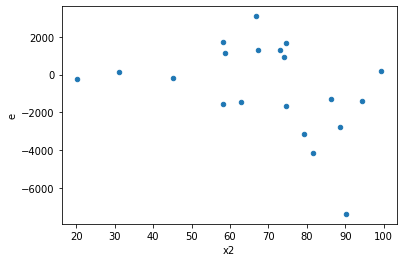

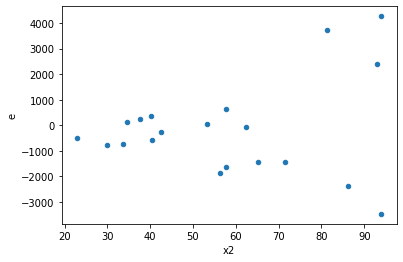

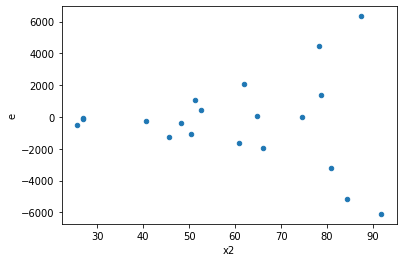

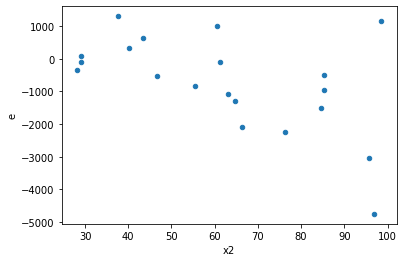

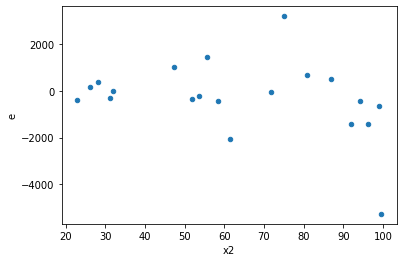

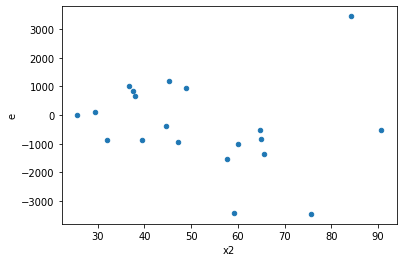

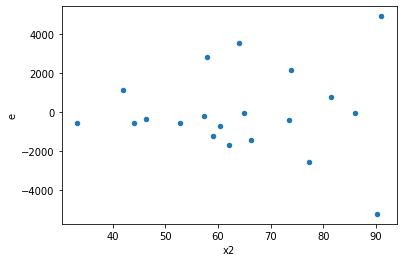

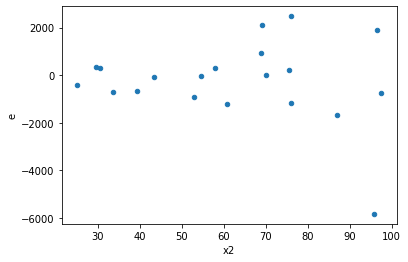

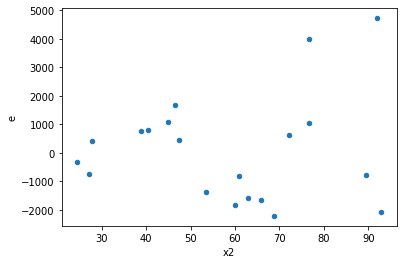

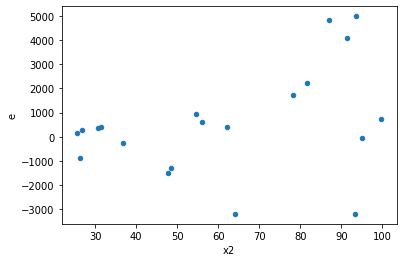

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,5.0,685815.8201917611,6777995.220965038,137163.16403835223,1355599.0441930075,9.883112960371548,0.02511850745844102,0.9874407462707795,0.01255925372922051,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,7595742.406152993,29965384.33091222,1519148.4812305986,5993076.866182445,3.9450237683993232,0.15826671568846784,0.9208666421557661,0.07913335784423392,Reject005=1 : Homoscedasticity
9.0,5.0,5.0,2907063.4115090873,27876828.26432579,581412.6823018175,5575365.652865158,9.589343030482654,0.02681870104912587,0.9865906494754371,0.013409350524562935,Reject005=0 : Heteroscedasticity
13.0,5.0,5.0,3136546.7785692676,7492231.456266896,627309.3557138535,1498446.291253379,2.388687937785028,0.361214425759256,0.819392787120372,0.180607212879628,Reject005=1 : Homoscedasticity
17.0,5.0,5.0,7922653.144227207,17385353.862083502,1584530.6288454414,3477070.7724167006,2.1943853334979377,0.40866865103402494,0.7956656744829875,0.20433432551701247,Reject005=1 : Homoscedasticity
18.0,5.0,5.0,8667343.13908704,46351026.828063354,1733468.627817408,9270205.36561267,5.347777985047637,0.08952413191832087,0.9552379340408396,0.044762065959160435,Reject005=1 : Homoscedasticity
20.0,5.0,5.0,2613080.0489275362,22302194.460243005,522616.0097855072,4460438.892048601,8.534830178431122,0.03444409055355191,0.982777954723224,0.017222045276775955,Reject005=0 : Heteroscedasticity
22.0,5.0,5.0,577916.5807019124,1893090.514868778,115583.31614038248,378618.10297375557,3.275715869874355,0.21878026862474798,0.890609865687626,0.10939013431237399,Reject005=1 : Homoscedasticity
24.0,5.0,5.0,4196393.875832493,15004622.913377194,839278.7751664987,3000924.582675439,3.575599278177988,0.18829184862998583,0.9058540756850071,0.09414592431499291,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,30066755.490596794,10982355.514717937,6013351.0981193585,2196471.102943587,0.36526573404811186,0.2931907901205532,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,685815.8201917611,6777995.220965038,137163.16403835223,1355599.0441930075,9.883112960371548,0.02511850745844102,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,65237396.15893994,40192083.603543036,13047479.231787989,8038416.720708607,0.6160896352396068,0.6079961320150498,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,19686878.354292247,3162678.777453058,3937375.6708584493,632535.7554906115,0.16064907399417705,0.06627188353052783,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,17495349.258545846,299889.39726950106,3499069.8517091693,59977.87945390021,0.017141092346185424,0.000393355324309024,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,12531073.545392288,7388991.30111046,2506214.7090784577,1477798.260222092,0.589653494119617,0.576228274458066,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,40600003.59374818,12889776.347776003,8120000.718749637,2577955.269555201,0.31748214795135743,0.23363215258262818,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,6338643.155904191,5704918.665149839,1267728.6311808382,1140983.7330299676,0.9000220591114891,0.9107942195737802,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,7595742.406152993,29965384.33091222,1519148.4812305986,5993076.866182445,3.9450237683993232,0.15826671568846784,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      620
Reject005=0 : Heteroscedasticity    380
Name: Result_test, dtype: int64